<a href="https://colab.research.google.com/github/LuisKenzo/Trabalho-de-Graduacao-Eng-Biomed/blob/main/TG3_2025_LuisKenzo_Revisao1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de posicionamento dos Eletrodos EMG

Cloning into 'Trabalho-de-Graduacao-Eng-Biomed'...
remote: Enumerating objects: 368, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 368 (delta 27), reused 6 (delta 6), pack-reused 328 (from 2)
Receiving objects: 100% (368/368), 7.46 MiB | 10.45 MiB/s, done.
Resolving deltas: 100% (137/137), done.


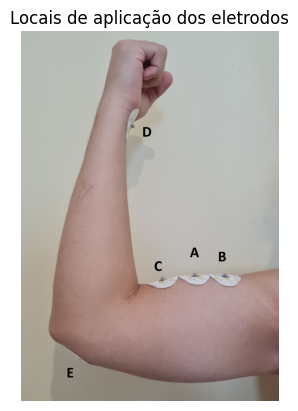

In [ ]:
#Clonando o github com os dados das coletas dos testes
!git clone https://github.com/LuisKenzo/Trabalho-de-Graduacao-Eng-Biomed.git

#Principais bibliotecas utilizadas
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import signal
conversao_AnalogRead_Volts = 5/1023

#Legenda das posições A,B e C dos eletrodos no bíceps
img = mpimg.imread('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicao_EMG.png')
plt.imshow(img)
plt.axis('off')
plt.title("Locais de aplicação dos eletrodos")
plt.show()

In [ ]:
#Nomeando os testes e tratamento de dados para tabela

#Posição 1
pos1_teste1 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1_Centro_do_biceps_REF_Pulso/Posicionamento1_teste1_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1_teste2 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1_Centro_do_biceps_REF_Pulso/Posicionamento1_teste2_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1_teste3 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1_Centro_do_biceps_REF_Pulso/Posicionamento1_teste3_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1_teste4 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1_Centro_do_biceps_REF_Pulso/Posicionamento1_teste4_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1_teste5 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1_Centro_do_biceps_REF_Pulso/Posicionamento1_teste5_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1_teste6 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1_Centro_do_biceps_REF_Pulso/Posicionamento1_teste6_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1_teste7 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1_Centro_do_biceps_REF_Pulso/Posicionamento1_teste7_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1_teste8 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1_Centro_do_biceps_REF_Pulso/Posicionamento1_teste8_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1_teste9 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1_Centro_do_biceps_REF_Pulso/Posicionamento1_teste9_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1_teste10 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1_Centro_do_biceps_REF_Pulso/Posicionamento1_teste10_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))

#Posição 1.1
pos1v2_teste1 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1.1_Centro_do_biceps_REF_Pulso/Posicionamento1_v2_teste1_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1v2_teste2 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1.1_Centro_do_biceps_REF_Pulso/Posicionamento1_v2_teste2_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1v2_teste3 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1.1_Centro_do_biceps_REF_Pulso/Posicionamento1_v2_teste3_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1v2_teste4 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1.1_Centro_do_biceps_REF_Pulso/Posicionamento1_v2_teste4_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1v2_teste5 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1.1_Centro_do_biceps_REF_Pulso/Posicionamento1_v2_teste5_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1v2_teste6 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1.1_Centro_do_biceps_REF_Pulso/Posicionamento1_v2_teste6_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1v2_teste7 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1.1_Centro_do_biceps_REF_Pulso/Posicionamento1_v2_teste7_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1v2_teste8 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1.1_Centro_do_biceps_REF_Pulso/Posicionamento1_v2_teste8_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1v2_teste9 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1.1_Centro_do_biceps_REF_Pulso/Posicionamento1_v2_teste9_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos1v2_teste10 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento1.1_Centro_do_biceps_REF_Pulso/Posicionamento1_v2_teste10_Centro_do_biceps_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))

#Posição 2
pos2_teste1 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento2_Centro_do_biceps_REF_Cotovelo/Posicionamento2_teste1_Centro_do_biceps_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos2_teste2 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento2_Centro_do_biceps_REF_Cotovelo/Posicionamento2_teste2_Centro_do_biceps_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos2_teste3 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento2_Centro_do_biceps_REF_Cotovelo/Posicionamento2_teste3_Centro_do_biceps_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos2_teste4 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento2_Centro_do_biceps_REF_Cotovelo/Posicionamento2_teste4_Centro_do_biceps_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos2_teste5 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento2_Centro_do_biceps_REF_Cotovelo/Posicionamento2_teste5_Centro_do_biceps_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos2_teste6 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento2_Centro_do_biceps_REF_Cotovelo/Posicionamento2_teste6_Centro_do_biceps_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos2_teste7 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento2_Centro_do_biceps_REF_Cotovelo/Posicionamento2_teste7_Centro_do_biceps_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos2_teste8 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento2_Centro_do_biceps_REF_Cotovelo/Posicionamento2_teste8_Centro_do_biceps_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos2_teste9 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento2_Centro_do_biceps_REF_Cotovelo/Posicionamento2_teste9_Centro_do_biceps_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos2_teste10 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento2_Centro_do_biceps_REF_Cotovelo/Posicionamento2_teste10_Centro_do_biceps_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))

#Posição 3
pos3_teste1 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento3_Tendao_Inervacao_REF_Pulso/Posicionamento3_teste1_Tendao_Inervacao_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos3_teste2 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento3_Tendao_Inervacao_REF_Pulso/Posicionamento3_teste2_Tendao_Inervacao_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos3_teste3 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento3_Tendao_Inervacao_REF_Pulso/Posicionamento3_teste3_Tendao_Inervacao_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos3_teste4 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento3_Tendao_Inervacao_REF_Pulso/Posicionamento3_teste4_Tendao_Inervacao_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos3_teste5 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento3_Tendao_Inervacao_REF_Pulso/Posicionamento3_teste5_Tendao_Inervacao_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos3_teste6 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento3_Tendao_Inervacao_REF_Pulso/Posicionamento3_teste6_Tendao_Inervacao_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos3_teste7 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento3_Tendao_Inervacao_REF_Pulso/Posicionamento3_teste7_Tendao_Inervacao_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos3_teste8 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento3_Tendao_Inervacao_REF_Pulso/Posicionamento3_teste8_Tendao_Inervacao_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos3_teste9 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento3_Tendao_Inervacao_REF_Pulso/Posicionamento3_teste9_Tendao_Inervacao_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos3_teste10 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento3_Tendao_Inervacao_REF_Pulso/Posicionamento3_teste10_Tendao_Inervacao_REF_Pulso.txt', sep=",", skiprows=(0,1,2,3,4,5,6))

#Posição 4
pos4_teste1 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento4_Tendao_Inervacao_REF_Cotovelo/Posicionamento4_teste1_Tendao_Inervacao_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos4_teste2 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento4_Tendao_Inervacao_REF_Cotovelo/Posicionamento4_teste2_Tendao_Inervacao_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos4_teste3 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento4_Tendao_Inervacao_REF_Cotovelo/Posicionamento4_teste3_Tendao_Inervacao_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos4_teste4 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento4_Tendao_Inervacao_REF_Cotovelo/Posicionamento4_teste4_Tendao_Inervacao_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos4_teste5 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento4_Tendao_Inervacao_REF_Cotovelo/Posicionamento4_teste5_Tendao_Inervacao_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos4_teste6 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento4_Tendao_Inervacao_REF_Cotovelo/Posicionamento4_teste6_Tendao_Inervacao_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos4_teste7 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento4_Tendao_Inervacao_REF_Cotovelo/Posicionamento4_teste7_Tendao_Inervacao_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos4_teste8 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento4_Tendao_Inervacao_REF_Cotovelo/Posicionamento4_teste8_Tendao_Inervacao_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos4_teste9 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento4_Tendao_Inervacao_REF_Cotovelo/Posicionamento4_teste9_Tendao_Inervacao_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))
pos4_teste10 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/00_Testes_de_posicionamento/Posicionamento4_Tendao_Inervacao_REF_Cotovelo/Posicionamento4_teste10_Tendao_Inervacao_REF_Cotovelo.txt', sep=",", skiprows=(0,1,2,3,4,5,6))


In [ ]:
#---------------------------------------------------------------
#FUNÇÃO FINALIZADA DE TRATAMENTO DE DADOS E ENCONTRAR AMPLITUDES
#---------------------------------------------------------------

def acha_amplitude(x):
  #TRATAMENTO DE DADOS DE FORMA DIGITAL
  x = x - np.mean(x) # faz o vetor ter média zero, o que minimiza efeitos de tendências ou drift de baixa freq
  # filtro butterworth - cria filtro passa-baixa de ordem 8 com frequência de corte de 0.0125 - relativa a freq de nyquist
  b, a = signal.butter(8, 0.0125)
  y = signal.filtfilt(b, a, x, padlen=150)

  #VETORIZAÇÃO DE VALES E PICOS
  picos = signal.find_peaks(y,width=100)
  vales = signal.find_peaks(-y,width=100)

  #CÁLCULO DE AMPLITUDE
  amplitudes = np.mean(y[picos[0]])-np.mean(y[vales[0]]) #diferença da média de picos e vales para ser considerada uma média de amplitude do sinal, suavizando os efeitos diversos de ruídos e variações de alta freq
  return amplitudes

## Teste de posicionamento 1
* Eletrodos bipolares posicionados ao centro do bíceps (Vermelho A, Verde B)
* Eletrodo de referência no pulso (Amarelo D)

Coletar os dados de 5 contrações.

Para compreender melhor os sinais adquiridos relativo ao fenômeno da contração, foi realizado 10 testes da mesma rotina e posicionamento. Vamos compará-los aqui apenas para efeitos de isolamento de informações.

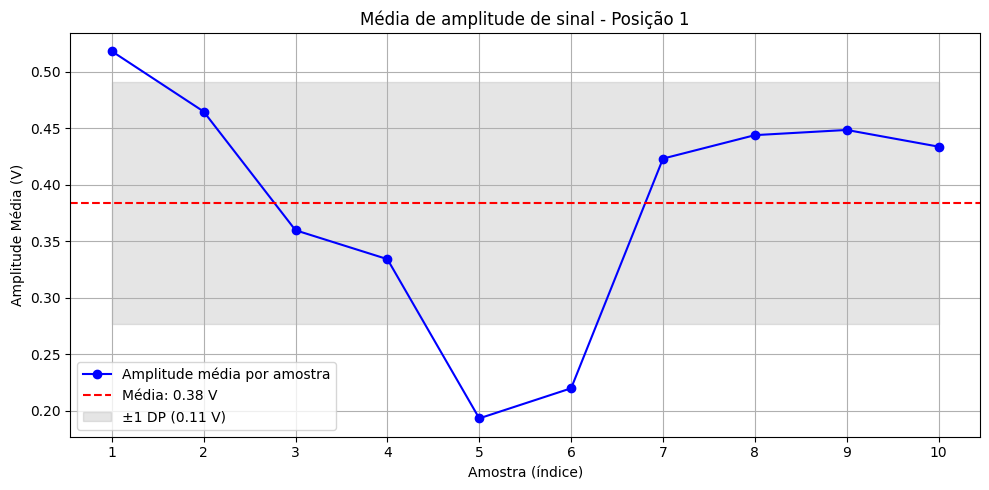

A maior amplitude média foi 0.52 V, na amostra 1
A menor amplitude média foi 0.19 V, na amostra 5
Desvio padrão das amplitudes: 0.11 V


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Amostras de contração
AMPMED_pos1 = [0]*10
AMPMED_pos1[0] = acha_amplitude(pos1_teste1["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos1[1] = acha_amplitude(pos1_teste2["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos1[2] = acha_amplitude(pos1_teste3["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos1[3] = acha_amplitude(pos1_teste4["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos1[4] = acha_amplitude(pos1_teste5["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos1[5] = acha_amplitude(pos1_teste6["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos1[6] = acha_amplitude(pos1_teste7["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos1[7] = acha_amplitude(pos1_teste8["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos1[8] = acha_amplitude(pos1_teste9["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos1[9] = acha_amplitude(pos1_teste10["Biceps_D"] * conversao_AnalogRead_Volts)

y = AMPMED_pos1
x = list(range(1, len(y) + 1))

# Cálculo da média e desvio padrão
media = np.mean(y)
desvio_padrao = np.std(y, ddof=1)  # ddof=1 para cálculo amostral

# Iniciando o plot do gráfico
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o-', color='blue', label='Amplitude média por amostra')

# Linha média
plt.axhline(media, color='red', linestyle='--', label=f'Média: {media:.2f} V')

# Faixa de ±1 desvio padrão
plt.fill_between(
    x,
    media - desvio_padrao,
    media + desvio_padrao,
    color='gray',
    alpha=0.2,
    label=f'±1 DP ({desvio_padrao:.2f} V)'
)

plt.title('Média de amplitude de sinal - Posição 1')
plt.xlabel('Amostra (índice)')
plt.ylabel('Amplitude Média (V)')
plt.xticks(x)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Valores máximo e mínimo
valor_maximo = max(y)
indice_maximo = y.index(valor_maximo)
print(f"A maior amplitude média foi {valor_maximo:.2f} V, na amostra {indice_maximo + 1}")

valor_minimo = min(y)
indice_minimo = y.index(valor_minimo)
print(f"A menor amplitude média foi {valor_minimo:.2f} V, na amostra {indice_minimo + 1}")

# Impressão do desvio padrão
print(f"Desvio padrão das amplitudes: {desvio_padrao:.2f} V")

## Teste de posicionamento 2

* Eletrodos bipolares posicionados ao centro do bíceps (Vermelho A, Verde B)
* Eletrodo de referência no cotovelo (Amarelo E)

Coletar os dados de 5 contrações.

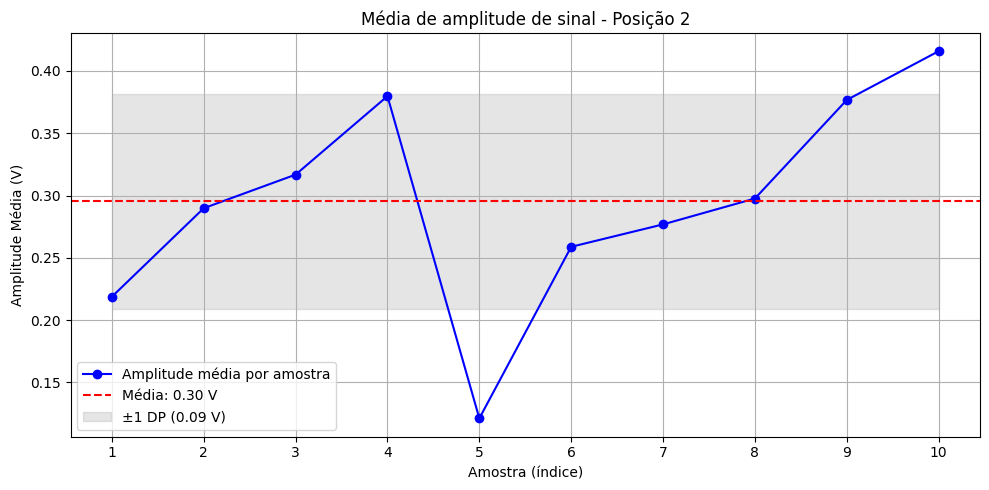

A maior amplitude média foi 0.42 V, na amostra 10
A menor amplitude média foi 0.12 V, na amostra 5
Desvio padrão das amplitudes: 0.09 V


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Amostras de contração
AMPMED_pos2 = [0]*10
AMPMED_pos2[0] = acha_amplitude(pos2_teste1["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos2[1] = acha_amplitude(pos2_teste2["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos2[2] = acha_amplitude(pos2_teste3["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos2[3] = acha_amplitude(pos2_teste4["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos2[4] = acha_amplitude(pos2_teste5["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos2[5] = acha_amplitude(pos2_teste6["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos2[6] = acha_amplitude(pos2_teste7["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos2[7] = acha_amplitude(pos2_teste8["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos2[8] = acha_amplitude(pos2_teste9["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos2[9] = acha_amplitude(pos2_teste10["Biceps_D"] * conversao_AnalogRead_Volts)

y = AMPMED_pos2
x = list(range(1, len(y) + 1))

# Cálculo da média e desvio padrão
media = np.mean(y)
desvio_padrao = np.std(y, ddof=1)  # ddof=1 para cálculo amostral

# Iniciando o plot do gráfico
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o-', color='blue', label='Amplitude média por amostra')

# Linha média
plt.axhline(media, color='red', linestyle='--', label=f'Média: {media:.2f} V')

# Faixa de ±1 desvio padrão
plt.fill_between(
    x,
    media - desvio_padrao,
    media + desvio_padrao,
    color='gray',
    alpha=0.2,
    label=f'±1 DP ({desvio_padrao:.2f} V)'
)

plt.title('Média de amplitude de sinal - Posição 2')
plt.xlabel('Amostra (índice)')
plt.ylabel('Amplitude Média (V)')
plt.xticks(x)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Valores máximo e mínimo
valor_maximo = max(y)
indice_maximo = y.index(valor_maximo)
print(f"A maior amplitude média foi {valor_maximo:.2f} V, na amostra {indice_maximo + 1}")

valor_minimo = min(y)
indice_minimo = y.index(valor_minimo)
print(f"A menor amplitude média foi {valor_minimo:.2f} V, na amostra {indice_minimo + 1}")

# Impressão do desvio padrão
print(f"Desvio padrão das amplitudes: {desvio_padrao:.2f} V")


## Teste de posicionamento 3

* Eletrodos bipolares posicionados entre o tendão distal do bíceps e a zona de inervação (Vermelho A, Verde C)
* Eletrodo de referência no pulso (Amarelo D)

Coletar os dados de 5 contrações.

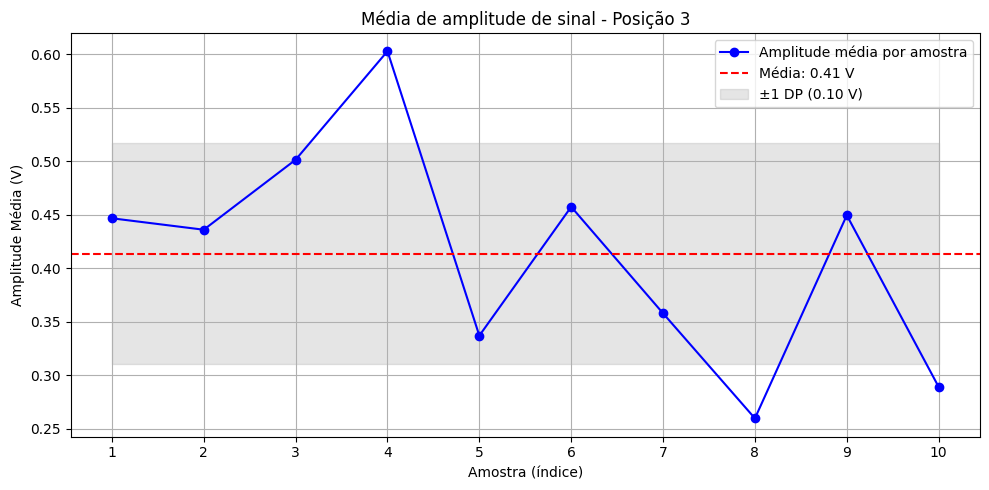

A maior amplitude média foi 0.60 V, na amostra 4
A menor amplitude média foi 0.26 V, na amostra 8
Desvio padrão das amplitudes: 0.10 V


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Amostras de contração
AMPMED_pos3 = [0]*10
AMPMED_pos3[0] = acha_amplitude(pos3_teste1["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos3[1] = acha_amplitude(pos3_teste2["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos3[2] = acha_amplitude(pos3_teste3["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos3[3] = acha_amplitude(pos3_teste4["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos3[4] = acha_amplitude(pos3_teste5["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos3[5] = acha_amplitude(pos3_teste6["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos3[6] = acha_amplitude(pos3_teste7["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos3[7] = acha_amplitude(pos3_teste8["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos3[8] = acha_amplitude(pos3_teste9["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos3[9] = acha_amplitude(pos3_teste10["Biceps_D"] * conversao_AnalogRead_Volts)

y = AMPMED_pos3
x = list(range(1, len(y) + 1))

# Cálculo da média e desvio padrão
media = np.mean(y)
desvio_padrao = np.std(y, ddof=1)  # ddof=1 para cálculo amostral

# Iniciando o plot do gráfico
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o-', color='blue', label='Amplitude média por amostra')

# Linha média
plt.axhline(media, color='red', linestyle='--', label=f'Média: {media:.2f} V')

# Faixa de ±1 desvio padrão
plt.fill_between(
    x,
    media - desvio_padrao,
    media + desvio_padrao,
    color='gray',
    alpha=0.2,
    label=f'±1 DP ({desvio_padrao:.2f} V)'
)

plt.title('Média de amplitude de sinal - Posição 3')
plt.xlabel('Amostra (índice)')
plt.ylabel('Amplitude Média (V)')
plt.xticks(x)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Valores máximo e mínimo
valor_maximo = max(y)
indice_maximo = y.index(valor_maximo)
print(f"A maior amplitude média foi {valor_maximo:.2f} V, na amostra {indice_maximo + 1}")

valor_minimo = min(y)
indice_minimo = y.index(valor_minimo)
print(f"A menor amplitude média foi {valor_minimo:.2f} V, na amostra {indice_minimo + 1}")

# Impressão do desvio padrão
print(f"Desvio padrão das amplitudes: {desvio_padrao:.2f} V")


## Teste de posicionamento 4

* Eletrodos bipolares posicionados entre o tendão distal do bíceps e a zona de inervação (Vermelho A, Verde C)
* Eletrodo de referência no pulso (Amarelo E)

Coletar os dados de 5 contrações.

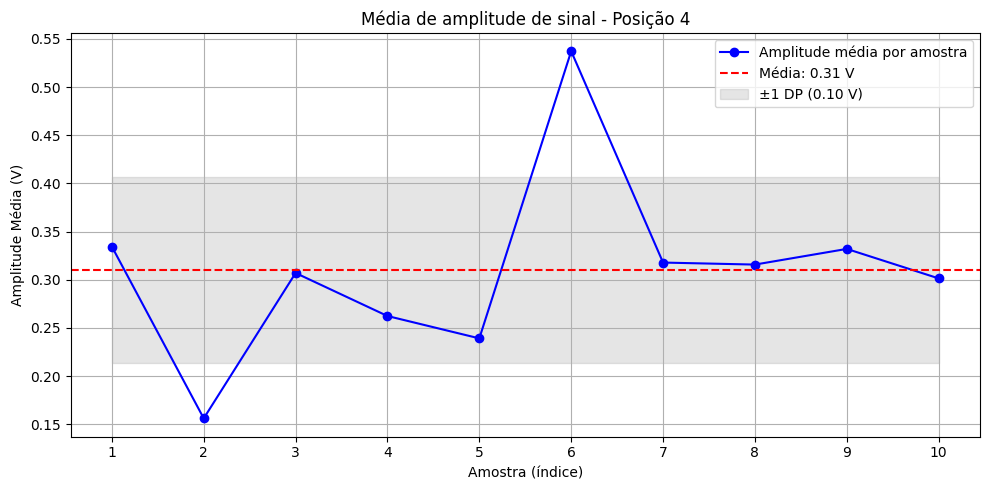

A maior amplitude média foi 0.54 V, na amostra 6
A menor amplitude média foi 0.16 V, na amostra 2
Desvio padrão das amplitudes: 0.10 V


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Amostras de contração
AMPMED_pos4 = [0]*10
AMPMED_pos4[0] = acha_amplitude(pos4_teste1["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos4[1] = acha_amplitude(pos4_teste2["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos4[2] = acha_amplitude(pos4_teste3["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos4[3] = acha_amplitude(pos4_teste4["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos4[4] = acha_amplitude(pos4_teste5["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos4[5] = acha_amplitude(pos4_teste6["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos4[6] = acha_amplitude(pos4_teste7["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos4[7] = acha_amplitude(pos4_teste8["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos4[8] = acha_amplitude(pos4_teste9["Biceps_D"] * conversao_AnalogRead_Volts)
AMPMED_pos4[9] = acha_amplitude(pos4_teste10["Biceps_D"] * conversao_AnalogRead_Volts)

y = AMPMED_pos4
x = list(range(1, len(y) + 1))

# Cálculo da média e desvio padrão
media = np.mean(y)
desvio_padrao = np.std(y, ddof=1)  # ddof=1 para cálculo amostral

# Iniciando o plot do gráfico
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o-', color='blue', label='Amplitude média por amostra')

# Linha média
plt.axhline(media, color='red', linestyle='--', label=f'Média: {media:.2f} V')

# Faixa de ±1 desvio padrão
plt.fill_between(
    x,
    media - desvio_padrao,
    media + desvio_padrao,
    color='gray',
    alpha=0.2,
    label=f'±1 DP ({desvio_padrao:.2f} V)'
)

plt.title('Média de amplitude de sinal - Posição 4')
plt.xlabel('Amostra (índice)')
plt.ylabel('Amplitude Média (V)')
plt.xticks(x)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Valores máximo e mínimo
valor_maximo = max(y)
indice_maximo = y.index(valor_maximo)
print(f"A maior amplitude média foi {valor_maximo:.2f} V, na amostra {indice_maximo + 1}")

valor_minimo = min(y)
indice_minimo = y.index(valor_minimo)
print(f"A menor amplitude média foi {valor_minimo:.2f} V, na amostra {indice_minimo + 1}")

# Impressão do desvio padrão
print(f"Desvio padrão das amplitudes: {desvio_padrao:.2f} V")


## Comparação de média de amplitudes de sinais

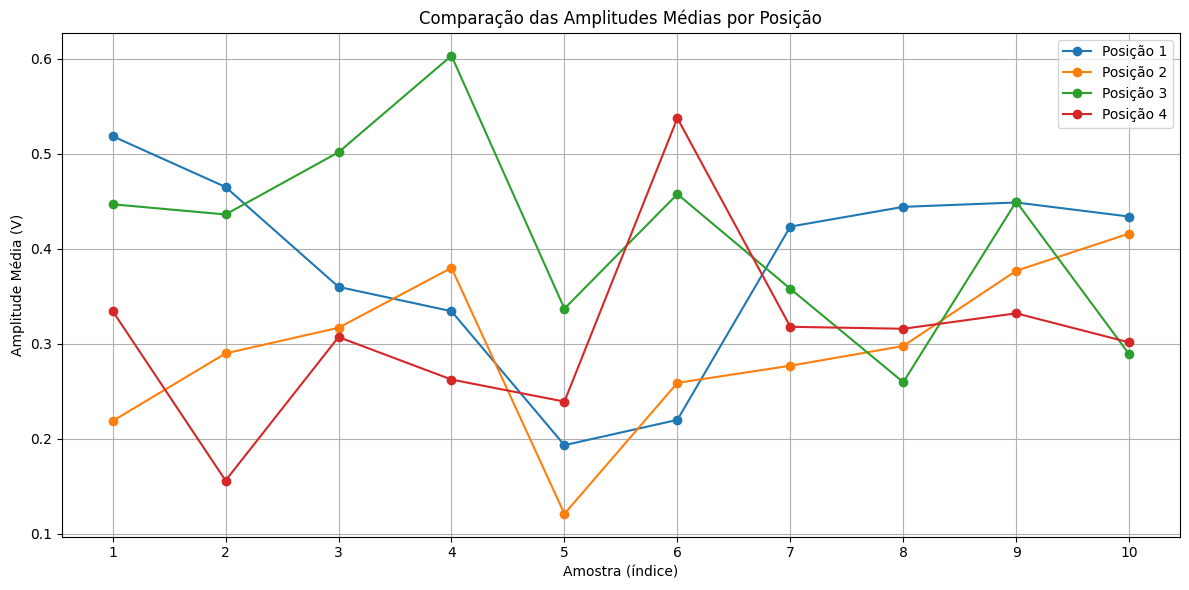

In [ ]:
vetores = [
    np.array(AMPMED_pos1),
    np.array(AMPMED_pos2),
    np.array(AMPMED_pos3),
    np.array(AMPMED_pos4),
]

nomes = ['Posição 1', 'Posição 2', 'Posição 3', 'Posição 4']

x = list(range(1, len(vetores[0]) + 1))  # Índices das amostras (1 a 10)

# Criando o gráfico
plt.figure(figsize=(12, 6))

for i, vetor in enumerate(vetores):
    plt.plot(x, vetor, marker='o', label=nomes[i])

plt.title('Comparação das Amplitudes Médias por Posição')
plt.xlabel('Amostra (índice)')
plt.ylabel('Amplitude Média (V)')
plt.xticks(x)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Frequência de amostragem do dispositivo
A partir da FFT das amostras coletadas é possível identificar quantitativamente a predominância do sinal captado no espectro das frequências.


## Análise das energias de todas as 10 amostras de cada posição

Posição 1 - Teste 1: 99,9% da energia está abaixo de 1.32 Hz
Posição 1 - Teste 2: 99,9% da energia está abaixo de 1.65 Hz
Posição 1 - Teste 3: 99,9% da energia está abaixo de 1.83 Hz
Posição 1 - Teste 4: 99,9% da energia está abaixo de 1.80 Hz
Posição 1 - Teste 5: 99,9% da energia está abaixo de 1.50 Hz
Posição 1 - Teste 6: 99,9% da energia está abaixo de 1.78 Hz
Posição 1 - Teste 7: 99,9% da energia está abaixo de 1.77 Hz
Posição 1 - Teste 8: 99,9% da energia está abaixo de 1.89 Hz
Posição 1 - Teste 9: 99,9% da energia está abaixo de 1.93 Hz
Posição 1 - Teste 10: 99,9% da energia está abaixo de 2.24 Hz

Resumo Posição 1:
Média da frequência limite = 1.77 Hz
Maior frequência limite = 2.24 Hz (Teste 10)
--------------------------------------------------


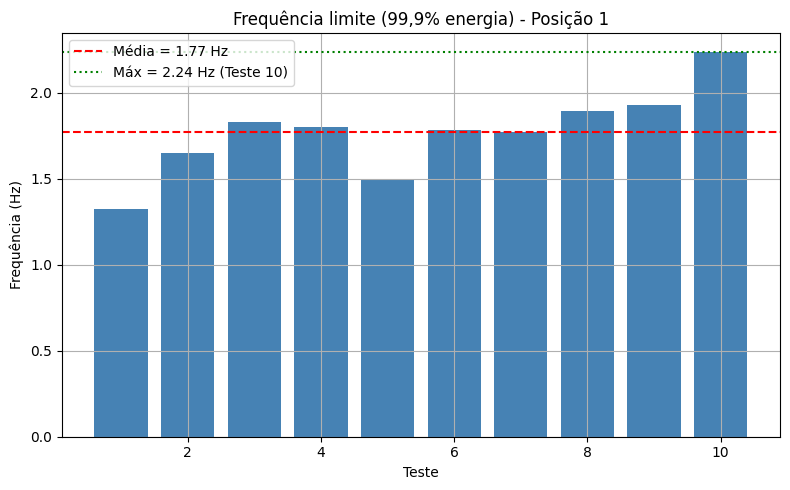

Posição 2 - Teste 1: 99,9% da energia está abaixo de 1.38 Hz
Posição 2 - Teste 2: 99,9% da energia está abaixo de 2.08 Hz
Posição 2 - Teste 3: 99,9% da energia está abaixo de 1.90 Hz
Posição 2 - Teste 4: 99,9% da energia está abaixo de 1.91 Hz
Posição 2 - Teste 5: 99,9% da energia está abaixo de 2.07 Hz
Posição 2 - Teste 6: 99,9% da energia está abaixo de 2.62 Hz
Posição 2 - Teste 7: 99,9% da energia está abaixo de 2.22 Hz
Posição 2 - Teste 8: 99,9% da energia está abaixo de 2.66 Hz
Posição 2 - Teste 9: 99,9% da energia está abaixo de 2.42 Hz
Posição 2 - Teste 10: 99,9% da energia está abaixo de 2.37 Hz

Resumo Posição 2:
Média da frequência limite = 2.16 Hz
Maior frequência limite = 2.66 Hz (Teste 8)
--------------------------------------------------


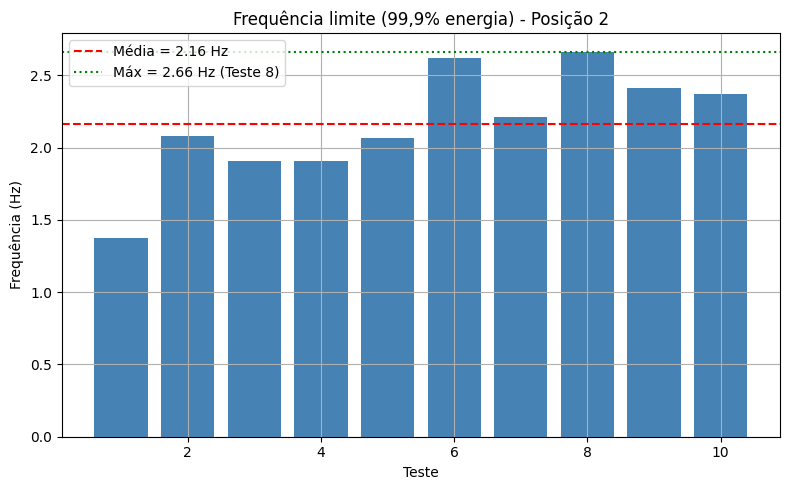

Posição 3 - Teste 1: 99,9% da energia está abaixo de 1.83 Hz
Posição 3 - Teste 2: 99,9% da energia está abaixo de 2.30 Hz
Posição 3 - Teste 3: 99,9% da energia está abaixo de 2.23 Hz
Posição 3 - Teste 4: 99,9% da energia está abaixo de 2.16 Hz
Posição 3 - Teste 5: 99,9% da energia está abaixo de 1.86 Hz
Posição 3 - Teste 6: 99,9% da energia está abaixo de 1.96 Hz
Posição 3 - Teste 7: 99,9% da energia está abaixo de 1.96 Hz
Posição 3 - Teste 8: 99,9% da energia está abaixo de 2.01 Hz
Posição 3 - Teste 9: 99,9% da energia está abaixo de 1.91 Hz
Posição 3 - Teste 10: 99,9% da energia está abaixo de 1.89 Hz

Resumo Posição 3:
Média da frequência limite = 2.01 Hz
Maior frequência limite = 2.30 Hz (Teste 2)
--------------------------------------------------


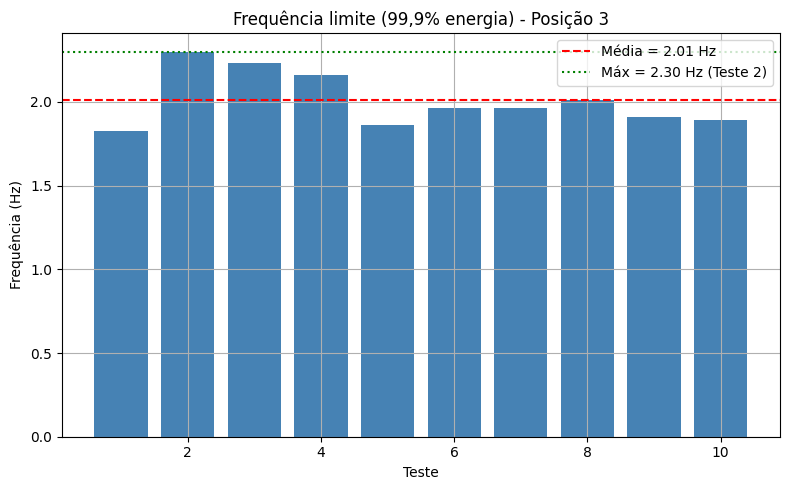

Posição 4 - Teste 1: 99,9% da energia está abaixo de 1.91 Hz
Posição 4 - Teste 2: 99,9% da energia está abaixo de 1.99 Hz
Posição 4 - Teste 3: 99,9% da energia está abaixo de 2.29 Hz
Posição 4 - Teste 4: 99,9% da energia está abaixo de 2.44 Hz
Posição 4 - Teste 5: 99,9% da energia está abaixo de 2.32 Hz
Posição 4 - Teste 6: 99,9% da energia está abaixo de 2.57 Hz
Posição 4 - Teste 7: 99,9% da energia está abaixo de 2.48 Hz
Posição 4 - Teste 8: 99,9% da energia está abaixo de 2.13 Hz
Posição 4 - Teste 9: 99,9% da energia está abaixo de 1.92 Hz
Posição 4 - Teste 10: 99,9% da energia está abaixo de 2.23 Hz

Resumo Posição 4:
Média da frequência limite = 2.23 Hz
Maior frequência limite = 2.57 Hz (Teste 6)
--------------------------------------------------


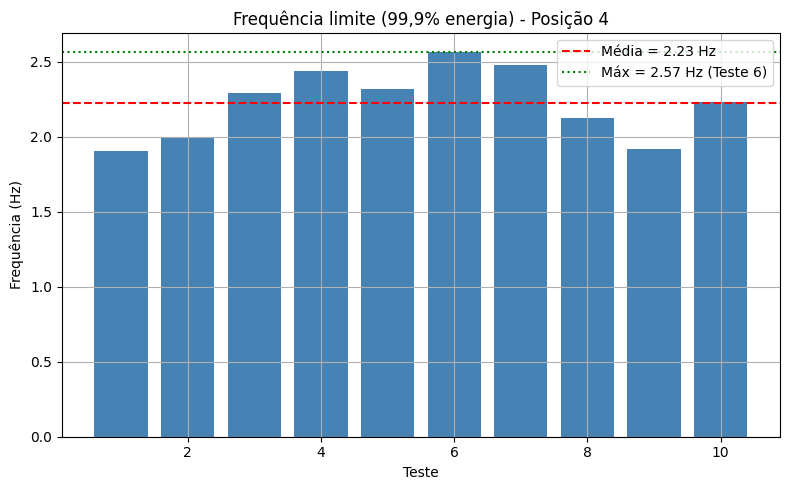

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Função para calcular frequência de contenção
def freq_contem_energia(sinal, fs=1000, threshold=0.999):
    N = len(sinal) # Calcula o tamanho do sinal (amostras)
    freqs = np.fft.rfftfreq(N, d=1/fs) # Cria o espectro de frequências com base na resolução temporal
    fft_vals = np.fft.rfft(sinal) # Calcula a FFT do sinal
    power = np.abs(fft_vals) ** 2 # Calcula espectro de potência assosiada a cada frequência
    energy_cumsum = np.cumsum(power) # Faz soma acumulativa de energia ao longo das frequências
    energy_cumsum = energy_cumsum / energy_cumsum[-1] # Normaliza a soma acumulada, variando de 0 a 1
    idx = np.where(energy_cumsum >= threshold)[0][0] # Identifica o índice em que a energia acumulada atinge ou ultrapassa o limite de 99,9%
    return freqs[idx] #Retorna a frequência de limite em que abaixo dela se tem 99,9% da energia do sinal

# --- Função para processar uma posição inteira ---
def analisar_posicao(testes, pos_label, fs=1000):
    freqs_999 = []
    for i, sinal in enumerate(testes, 1):
        freq_999 = freq_contem_energia(sinal * conversao_AnalogRead_Volts, fs=fs)
        freqs_999.append(freq_999)
        print(f"{pos_label} - Teste {i}: 99,9% da energia está abaixo de {freq_999:.2f} Hz")

    media_freq = np.mean(freqs_999)
    max_freq = np.max(freqs_999)
    idx_max = np.argmax(freqs_999) + 1

    print(f"\nResumo {pos_label}:")
    print(f"Média da frequência limite = {media_freq:.2f} Hz")
    print(f"Maior frequência limite = {max_freq:.2f} Hz (Teste {idx_max})")
    print("-"*50)

    # --- Gráfico ---
    plt.figure(figsize=(8,5))
    plt.bar(range(1, 11), freqs_999, color='steelblue')
    plt.axhline(media_freq, color='red', linestyle='--', label=f'Média = {media_freq:.2f} Hz')
    plt.axhline(max_freq, color='green', linestyle=':', label=f'Máx = {max_freq:.2f} Hz (Teste {idx_max})')
    plt.title(f"Frequência limite (99,9% energia) - {pos_label}")
    plt.xlabel("Teste")
    plt.ylabel("Frequência (Hz)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return freqs_999, media_freq, max_freq, idx_max

# --- Listas de amostras (exemplo) ---
testes_pos1 = [pos1_teste1["Biceps_D"], pos1_teste2["Biceps_D"], pos1_teste3["Biceps_D"],
               pos1_teste4["Biceps_D"], pos1_teste5["Biceps_D"], pos1_teste6["Biceps_D"],
               pos1_teste7["Biceps_D"], pos1_teste8["Biceps_D"], pos1_teste9["Biceps_D"],
               pos1_teste10["Biceps_D"]]

testes_pos2 = [pos2_teste1["Biceps_D"], pos2_teste2["Biceps_D"], pos2_teste3["Biceps_D"],
               pos2_teste4["Biceps_D"], pos2_teste5["Biceps_D"], pos2_teste6["Biceps_D"],
               pos2_teste7["Biceps_D"], pos2_teste8["Biceps_D"], pos2_teste9["Biceps_D"],
               pos2_teste10["Biceps_D"]]

testes_pos3 = [pos3_teste1["Biceps_D"], pos3_teste2["Biceps_D"], pos3_teste3["Biceps_D"],
               pos3_teste4["Biceps_D"], pos3_teste5["Biceps_D"], pos3_teste6["Biceps_D"],
               pos3_teste7["Biceps_D"], pos3_teste8["Biceps_D"], pos3_teste9["Biceps_D"],
               pos3_teste10["Biceps_D"]]

testes_pos4 = [pos4_teste1["Biceps_D"], pos4_teste2["Biceps_D"], pos4_teste3["Biceps_D"],
               pos4_teste4["Biceps_D"], pos4_teste5["Biceps_D"], pos4_teste6["Biceps_D"],
               pos4_teste7["Biceps_D"], pos4_teste8["Biceps_D"], pos4_teste9["Biceps_D"],
               pos4_teste10["Biceps_D"]]

# --- Executar análise para todas as posições ---
resultados = {}
resultados["Posição 1"] = analisar_posicao(testes_pos1, "Posição 1")
resultados["Posição 2"] = analisar_posicao(testes_pos2, "Posição 2")
resultados["Posição 3"] = analisar_posicao(testes_pos3, "Posição 3")
resultados["Posição 4"] = analisar_posicao(testes_pos4, "Posição 4")


/tmp/ipython-input-1599237962.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dados, labels=["Posição 1", "Posição 2", "Posição 3", "Posição 4"], patch_artist=True)


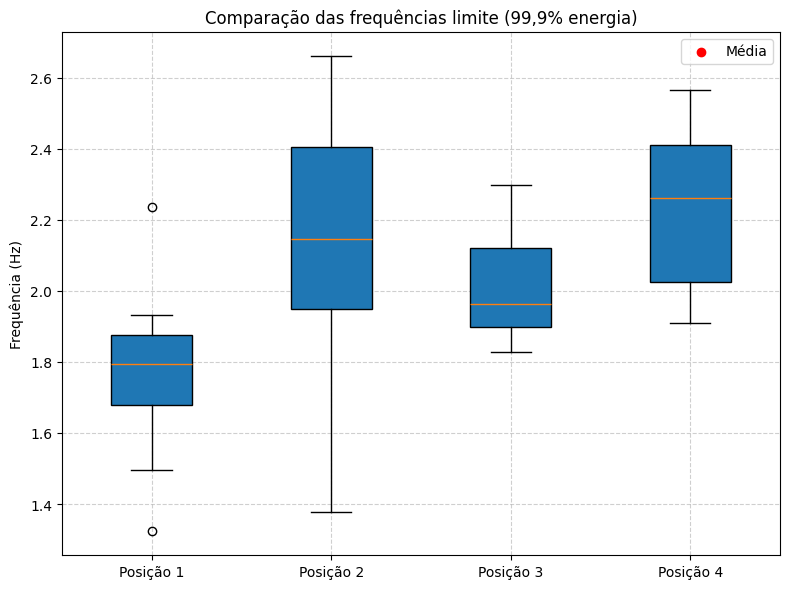

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Organizar resultados (após rodar a função analisar_posicao) ---
freqs_pos1, media1, max1, _ = resultados["Posição 1"]
freqs_pos2, media2, max2, _ = resultados["Posição 2"]
freqs_pos3, media3, max3, _ = resultados["Posição 3"]
freqs_pos4, media4, max4, _ = resultados["Posição 4"]

# --- Dados agrupados ---
dados = [freqs_pos1, freqs_pos2, freqs_pos3, freqs_pos4]

# --- Boxplot comparativo ---
plt.figure(figsize=(8,6))
plt.boxplot(dados, labels=["Posição 1", "Posição 2", "Posição 3", "Posição 4"], patch_artist=True)

# Destaque das médias
plt.scatter([1,2,3,4], [media1, media2, media3, media4], color="red", marker="o", label="Média")

plt.title("Comparação das frequências limite (99,9% energia)")
plt.ylabel("Frequência (Hz)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# Entendendo se filtro RC está funcionando
## FFT na aquisição de dados do módulo no Arduino a 1000 Hz

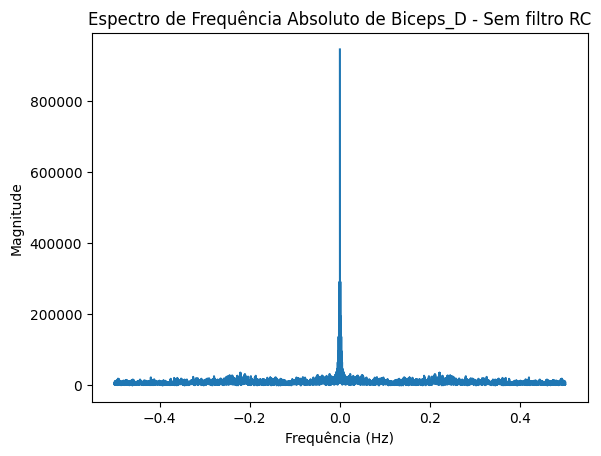

np.float64(0.49992344204562855)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### TESTE 1 ###
data_arduino_pos1_1000hz_tst1 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/01_Coleta_direta_de_sinal_EMG/Teste_de_Amostragem_1000hz_posicao1_teste1_Sem RC.txt', sep=",", skiprows=(0,1,2,3,4,5,6))

# Calcular a FFT do sinal "Biceps_D"
fft_biceps_d = np.fft.fft(data_arduino_pos1_1000hz_tst1["Biceps_D"])

# Obter a magnitude da FFT (módulo dos valores complexos)
magnitude_fft = np.abs(fft_biceps_d)

# Obter as frequências correspondentes aos valores da FFT
frequencies = np.fft.fftfreq(len(data_arduino_pos1_1000hz_tst1["Biceps_D"]))

# Plotar o espectro de frequência (magnitude vs frequência)
plt.plot(frequencies, magnitude_fft)
plt.title("Espectro de Frequência Absoluto de Biceps_D - Sem filtro RC")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.show()
max(frequencies)

## FFT dos filtros RC adicionados

Frequência de amostragem RC (Hz): 1000.0


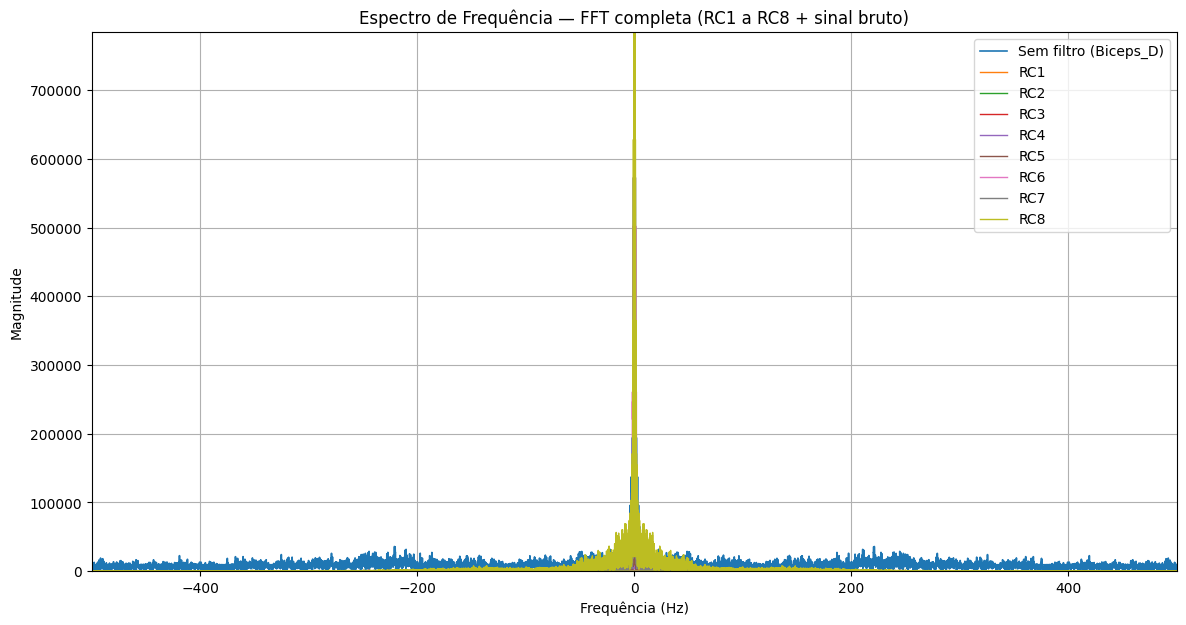

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =====================================================
# 1. SEM FILTRO — SINAL BRUTO
# =====================================================

data_semfiltro = pd.read_csv(
    '/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/01_Coleta_direta_de_sinal_EMG/Teste_de_Amostragem_1000hz_posicao1_teste1_Sem RC.txt',
    sep=",",
    skiprows=(0,1,2,3,4,5,6)
)

sinal_bruto = data_semfiltro["Biceps_D"].values
fs_semfiltro = 1000
dt_sem = 1 / fs_semfiltro

fft_sem = np.fft.fft(sinal_bruto)
mag_sem = np.abs(fft_sem)
freq_sem = np.fft.fftfreq(len(sinal_bruto), d=dt_sem)


# =====================================================
# 2. COM FILTRO — RC1 a RC8
# =====================================================

data_rc = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Filtros_RC_v2.txt',
                      sep="\t", header=1)

data_rc.columns = data_rc.columns.str.strip()
tempo_ms = data_rc["tempo_ms"].values

# Cálculo automático da frequência de amostragem
dt = (tempo_ms[1] - tempo_ms[0]) / 1000
fs_rc = 1 / dt
print("Frequência de amostragem RC (Hz):", fs_rc)

# Lista com os nomes das colunas RC
rc_cols = ["RC1", "RC2", "RC3", "RC4", "RC5", "RC6", "RC7", "RC8"]


# =====================================================
# 3. FFT de TODOS os RC AUTOMATICAMENTE
# =====================================================

plt.figure(figsize=(14, 7))

# ---- FFT do sinal sem filtro ----
plt.plot(freq_sem, mag_sem, label="Sem filtro (Biceps_D)", linewidth=1.2)

# ---- Loop para cada RC ----
for rc in rc_cols:
    sinal = data_rc[rc].values
    fft_rc = np.fft.fft(sinal)
    mag_rc = np.abs(fft_rc)
    freq_rc = np.fft.fftfreq(len(sinal), d=dt)

    plt.plot(freq_rc, mag_rc, label=rc, linewidth=1)


# =====================================================
# 4. CONFIGURAÇÕES DO GRÁFICO
# =====================================================

plt.title("Espectro de Frequência — FFT completa (RC1 a RC8 + sinal bruto)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()

# Mostra todas frequências positivas e negativas
plt.xlim(freq_sem.min(), freq_sem.max())

# Ajusta zoom no eixo Y para destacar frequências menores
plt.ylim(0, 0.2 * max(mag_sem.max(), max(mag_rc)))

plt.show()


Frequência de amostragem RC (Hz): 1000.0


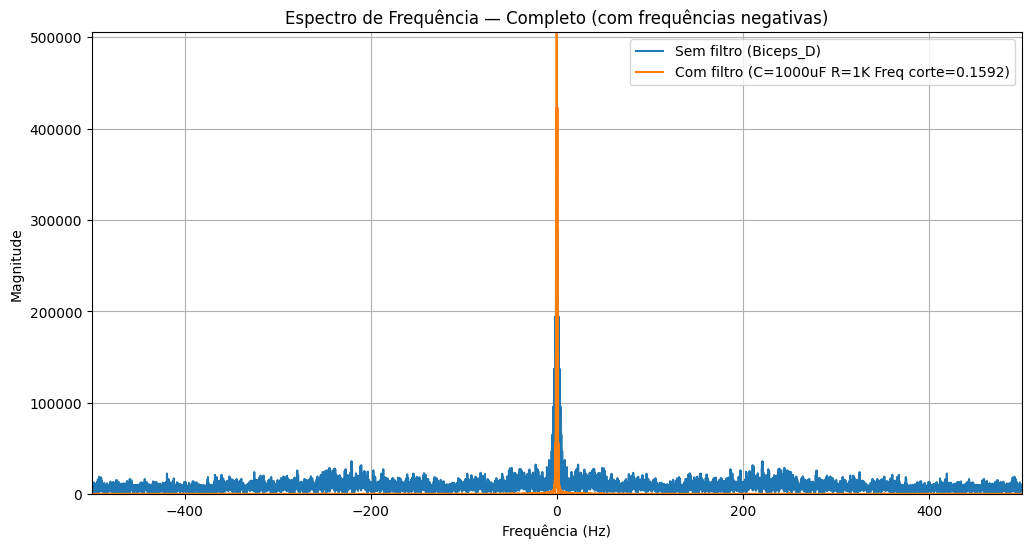

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =====================================================
# 1. SEM FILTRO — SINAL BRUTO
# =====================================================

data_semfiltro = pd.read_csv(
    '/content/Trabalho-de-Graduacao-Eng-Biomed/Dados/01_Coleta_direta_de_sinal_EMG/Teste_de_Amostragem_1000hz_posicao1_teste1_Sem RC.txt',
    sep=",",
    skiprows=(0,1,2,3,4,5,6)
)

# Extrair sinal
sinal_bruto = data_semfiltro["Biceps_D"].values

# Fs = 1000 Hz
fs_semfiltro = 1000
dt_sem = 1 / fs_semfiltro

# FFT completa (positiva + negativa)
fft_sem = np.fft.fft(sinal_bruto)
mag_sem = np.abs(fft_sem)
freq_sem = np.fft.fftfreq(len(sinal_bruto), d=dt_sem)


# =====================================================
# 2. COM FILTRO — RC5
# =====================================================

data_rc = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Filtros_RC_v2.txt', sep="\t", header=1)
data_rc.columns = data_rc.columns.str.strip()

tempo_ms = data_rc["tempo_ms"].values
rc5 = data_rc["RC5"].values

# Calcular automaticamente Fs
dt = (tempo_ms[1] - tempo_ms[0]) / 1000
fs_rc = 1 / dt
print("Frequência de amostragem RC (Hz):", fs_rc)

# FFT RC1 completa (positiva + negativa)
fft_rc1 = np.fft.fft(rc5)
mag_rc1 = np.abs(fft_rc1)
freq_rc = np.fft.fftfreq(len(rc5), d=dt)


# =====================================================
# 3. PLOTAR AS DUAS FFTs (INCLUINDO FREQUÊNCIAS NEGATIVAS)
# =====================================================

plt.figure(figsize=(12,6))

plt.plot(freq_sem, mag_sem, label="Sem filtro (Biceps_D)")
plt.plot(freq_rc, mag_rc1, label="Com filtro (C=1000uF R=1K Freq corte=0.1592)")

plt.title("Espectro de Frequência — Completo (com frequências negativas)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()

# Mostrar TODAS as frequências (negativas e positivas)
plt.xlim(freq_sem.min(), freq_sem.max())

# Zoom no eixo Y para destacar pequenas frequências
plt.ylim(0, 0.2 * max(mag_sem.max(), mag_rc1.max()))

plt.show()


# Contagem de contrações a 10hz - Gerando imagem de suporte

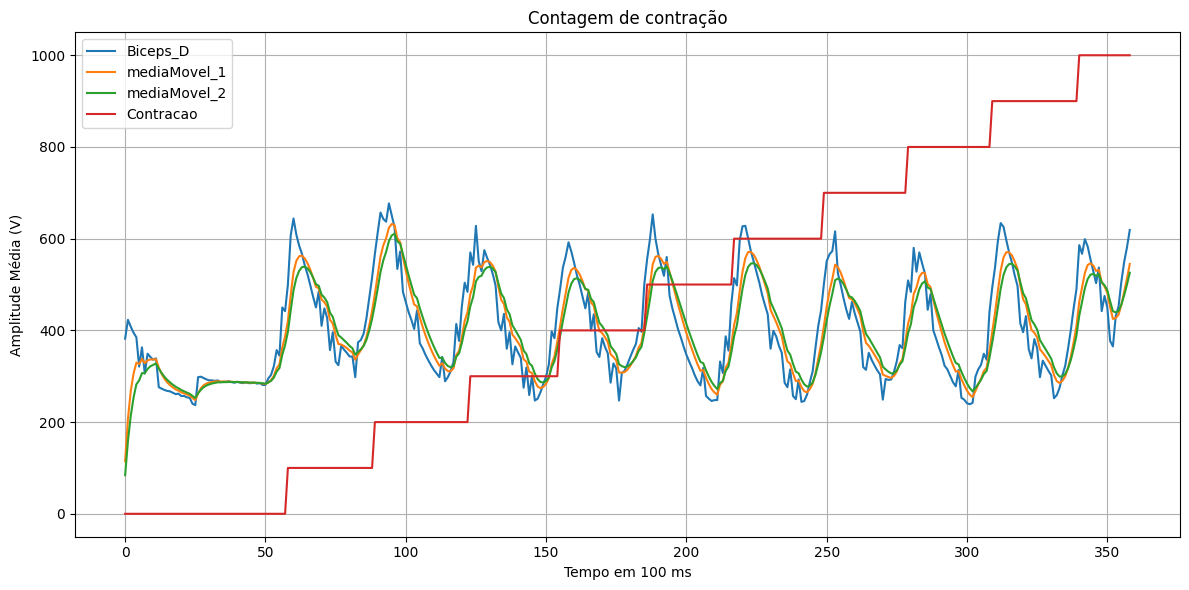

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### TESTE 1 ###
data_arduino_pos3_10hz_tst1 = pd.read_csv('/content/Trabalho-de-Graduacao-Eng-Biomed/Contagem de contrações _10hz_10contracoes_ teste1.txt', sep=",", skiprows=(0,1,2,3,4,5,6,7,8))

vetores = [
    np.array(data_arduino_pos3_10hz_tst1["Biceps_D"]),
    np.array(data_arduino_pos3_10hz_tst1["mediaMovel_1"]),
    np.array(data_arduino_pos3_10hz_tst1["mediaMovel_2"]),
    np.array(data_arduino_pos3_10hz_tst1["Contracao"])*100,
]

nomes = ['Biceps_D', 'mediaMovel_1', 'mediaMovel_2', 'Contracao']

# Criando o gráfico
plt.figure(figsize=(12, 6))

for i, vetor in enumerate(vetores):
    plt.plot(vetor, label=nomes[i])

plt.title('Contagem de contração')
plt.xlabel('Tempo em 100 ms')
plt.ylabel('Amplitude Média (V)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
